In [1]:
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [2]:
rin = pd.read_csv('rin.combined.tsv', sep='\t')
tin = pd.read_csv('tin.combined.by_transcript.tsv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# prep RIN

In [3]:
pheno = pd.read_csv('../../16p12.2_rnaseq_analysis/data/pheno_final.tsv', sep='\t')
samples = pheno['sample'].to_list()

In [4]:
d_samples = {}
for s in samples:
    l = s.split('_')
    if not l[-2].startswith('GM'):
        s1 = l[-1]
        s2 = l[-3] + l[-2]
    else:
        s1 = l[-1]
        s2 = l[-2]

    d_samples[s2] = s1

In [5]:
rin['Sample_no_underscore'] = rin.Sample.apply(lambda s: ''.join(s.split('_')))
rin['samp'] = rin['Sample_no_underscore'].apply(lambda s: d_samples[s])
rin = rin.set_index('samp', drop=False)

## Prep TIN

In [6]:
tinMed = pd.DataFrame(index=rin.samp)
tinMed['tinMed'] = 0.0
for s in tinMed.index:
    tinMed.at[s, 'tinMed'] = tin[s][tin[s] != 0].median()

In [7]:
s = 'S1'
ser = tin[s][tin[s] != 0]
ser.median()

71.91414550330106

## plot

In [8]:
dfplot = tinMed.copy()
dfplot['rin'] = rin['RIN score']

In [9]:
from scipy.stats import pearsonr

In [10]:
x = dfplot.tinMed.to_list()
y = dfplot.rin.to_list()
pearsonr(x, y)

(0.3818556154116212, 0.00012357033098244304)

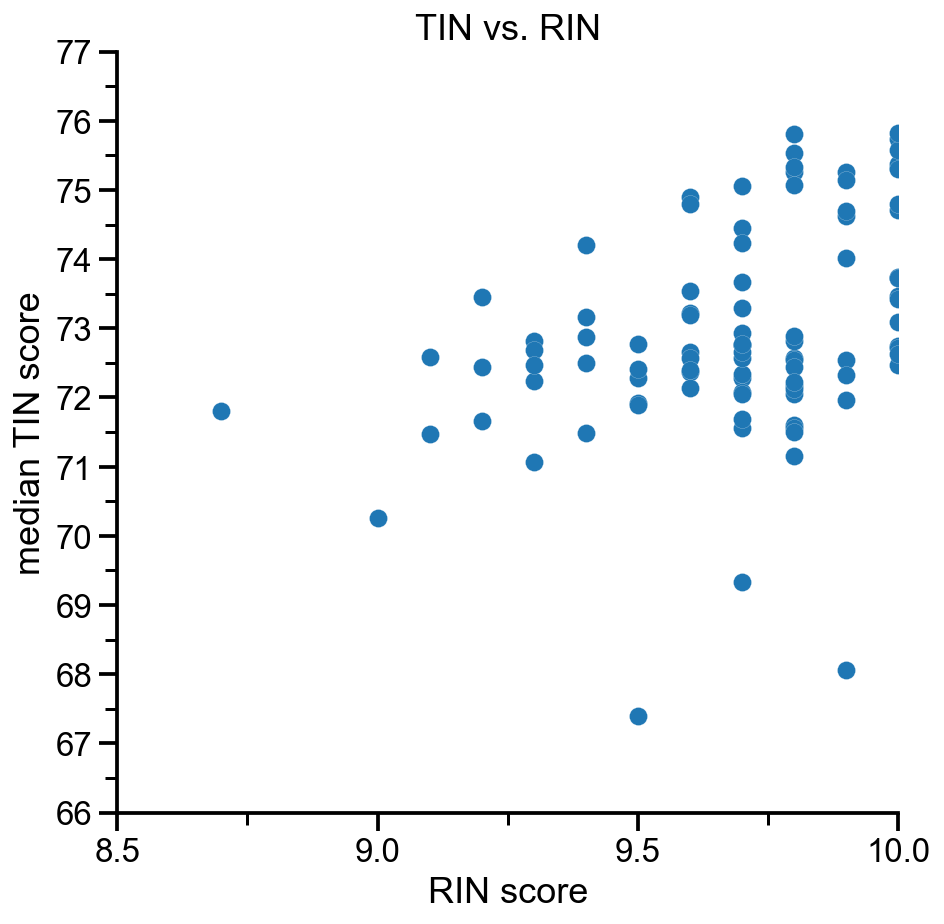

In [11]:
plt.figure(figsize=(7,7))
sns.set_context('talk')

g = sns.scatterplot(data=dfplot, x='rin', y='tinMed', linewidth=0.1)

g.set_ylim([66, 77])
g.set_xlim([8.5,10])

g.get_yaxis().set_major_locator(MultipleLocator(1))
g.get_yaxis().set_minor_locator(MultipleLocator(.5))

g.get_xaxis().set_major_locator(MultipleLocator(.5))
g.get_xaxis().set_minor_locator(MultipleLocator(.25))

g.set_title('TIN vs. RIN')
g.set_ylabel('median TIN score')
g.set_xlabel('RIN score')

sns.despine()

# plt.tight_layout()
plt.savefig('tin_v_rin.pdf', dpi=300)